# This example shows how to track through a FODO cell

In [1]:
import RF_Track as RFT
import numpy as np
import matplotlib.pyplot as plt

## Bunch parameters

In [2]:
# Bunch parameters
mass = RFT.electronmass # MeV/c^2
charge = -1 # single-particle charge, in units of e
population = 1*RFT.nC # number of real particles per bunch
Pc = 5 # reference momentum, MeV/c
P_Q = Pc / charge # MV/c, reference rigidity

## FODO cell parameters

In [3]:
# FODO cell parameters
Lcell = 2 # m
Lquad = 0 # m
Ldrift = Lcell/2 - Lquad # m

mu = np.deg2rad(90) # deg
k1L = np.sin(mu/2) / (Lcell/4) # 1/m

strength = k1L * P_Q # MeV/m

In thin-lens approximation, the matrix for the complete FODO cell reads
$$
M = 
\left(
\begin{matrix}
1 - \frac{l_d^2}{2f^2} & 2l_d \left( 1 + \frac{l_d}{2f} \right) \\ 
 \frac{l_d^2}{4{f}^3} - \frac{l_d}{2f^2}  & 1 - \frac{l_d^2}{2f^2}\\
\end{matrix}
\right),
$$
where $l_d$ the distance between the centre of the two quadrupoles and $f = 1/\left(k_1 \cdot l_q\right)$ is the quadrupole focal length. The length of the cell is $L_\text{cell} = 2 l_d$.

The phase advance, $\mu$, is related to the transfer matrix by: 
$$
cos{\mu} = \frac{1}{2}\text{Trace}(M) = 1 - \frac{l_d^2}{2f^2}.
$$
Since
$$
\cos(\mu) = 1 - 2\sin^2{\frac{\mu}{2}},
$$
one can write:
$$
\sin{\frac{\mu}{2}} = \frac{L}{4f} = \frac{k_1\,l_q\,L_\text{cell}}{4}.
$$

## Let's define the elements

In [4]:
# Half a focusing quadrupole

Qf = RFT.Quadrupole(Lquad/2, strength/2)

# A full, defocusing, quadrupole
QD = RFT.Quadrupole(Lquad, -strength)

# The Drift
Dr = RFT.Drift(Ldrift);
Dr.set_tt_nsteps(100);

# Let's define the FODO cell

In [5]:
FODO = RFT.Lattice()
FODO.append(Qf)
FODO.append(Dr)
FODO.append(QD)
FODO.append(Dr)
FODO.append(Qf)

In [6]:
FODO.get_length()

2.0

In [7]:
FODO.size()

5

In [8]:
FODO[3].get_length()

1.0

# ...and a bunch

In [9]:
# Define Twiss parameters
Twiss = RFT.Bunch6d_twiss()
Twiss.emitt_x = 0.001 # mm.mrad, normalized emittances
Twiss.emitt_y = 0.001 # mm.mrad
Twiss.alpha_x = 0.0
Twiss.alpha_y = 0.0
Twiss.beta_x = Lcell * (1 + np.sin(mu/2)) / np.sin(mu) # m
Twiss.beta_y = Lcell * (1 - np.sin(mu/2)) / np.sin(mu) # m

# Create the bunch
B0 = RFT.Bunch6d(mass, population, charge, Pc, Twiss, 10000)

In [10]:
print(Twiss.beta_x)
print(Twiss.beta_y)

3.414213562373095
0.5857864376269049


# Then, we can perform tracking

In [11]:
B1 = FODO.track(B0)

We can inquire the lattice to find out, for example, the Twiss parameters and the emittance

In [12]:
T = FODO.get_transport_table('%S %beta_x %beta_y %emitt_x %emitt_y %sigma_x %sigma_y');

Text(0, 0.5, '$\\beta$ [m]')

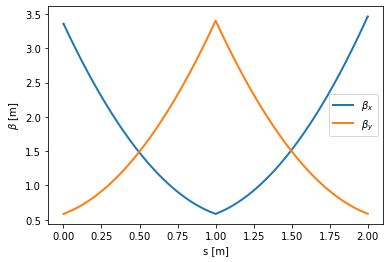

In [13]:
plt.plot(T[:,0], T[:,1], linewidth=2, label=r'$\beta_x$')
plt.plot(T[:,0], T[:,2], linewidth=2, label=r'$\beta_y$')
plt.legend()
plt.xlabel('s [m]')
plt.ylabel(r'$\beta$ [m]')

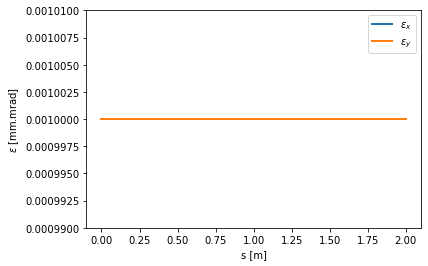

In [14]:
plt.plot(T[:,0], T[:,3], linewidth=2, label=r'$\epsilon_x$')
plt.plot(T[:,0], T[:,4], linewidth=2, label=r'$\epsilon_y$')
plt.xlabel('s [m]')
plt.ylabel(r'$\epsilon$ [mm.mrad]')
plt.ylim([0.99e-3, 1.01e-3])
plt.legend()

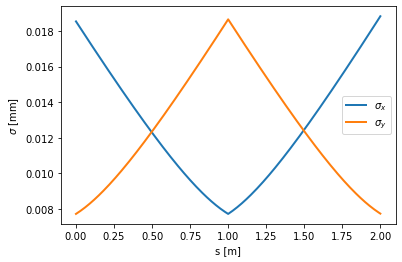

In [15]:
plt.plot(T[:,0], T[:,5], linewidth=2, label=r'$\sigma_x$')
plt.plot(T[:,0], T[:,6], linewidth=2, label=r'$\sigma_y$')
plt.xlabel('s [m]')
plt.ylabel(r'$\sigma$ [mm]')
plt.legend()

In [16]:
M0 = B0.get_phase_space()
M1 = B1.get_phase_space()

Text(0, 0.5, "x' [mrad]")

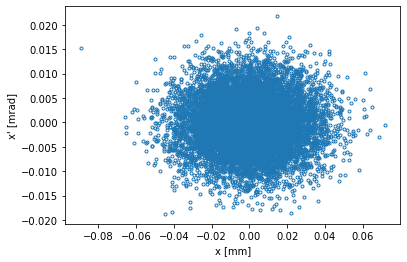

In [17]:
plt.plot(M0[:,0], M0[:,1], '.', mfc='none')
plt.xlabel('x [mm]')
plt.ylabel("x' [mrad]")

Text(0, 0.5, 'X [mm]')

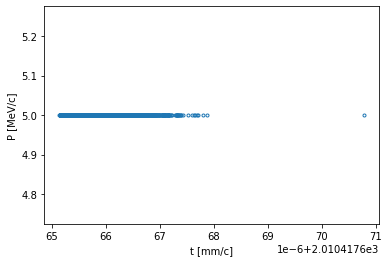

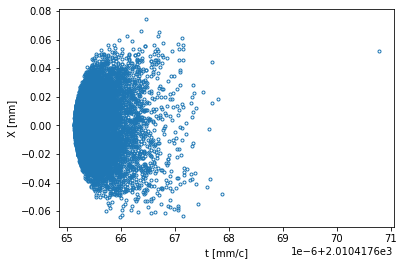

In [18]:
plt.figure()
plt.plot(M1[:,4], M1[:,5], '.', mfc='none')
plt.xlabel('t [mm/c]')
plt.ylabel('P [MeV/c]')

plt.figure()
plt.plot(M1[:,4], M1[:,0], '.', mfc='none')
plt.xlabel('t [mm/c]')
plt.ylabel('X [mm]')

In [19]:
B1.get_phase_space('%Vz')[0:9]

array([[0.99481816],
       [0.99481816],
       [0.99481816],
       [0.99481816],
       [0.99481816],
       [0.99481816],
       [0.99481816],
       [0.99481816],
       [0.99481816]])

In [20]:
B0.get_phase_space('%m %Q %N')[0:9,:]

array([[ 5.10998950e-01, -1.00000000e+00,  6.24150907e+05],
       [ 5.10998950e-01, -1.00000000e+00,  6.24150907e+05],
       [ 5.10998950e-01, -1.00000000e+00,  6.24150907e+05],
       [ 5.10998950e-01, -1.00000000e+00,  6.24150907e+05],
       [ 5.10998950e-01, -1.00000000e+00,  6.24150907e+05],
       [ 5.10998950e-01, -1.00000000e+00,  6.24150907e+05],
       [ 5.10998950e-01, -1.00000000e+00,  6.24150907e+05],
       [ 5.10998950e-01, -1.00000000e+00,  6.24150907e+05],
       [ 5.10998950e-01, -1.00000000e+00,  6.24150907e+05]])